## Multimodal AI Assistants

*[Coding along with the Udemy online course [LLM Engineering: Master AI & Large Language Models](https://www.udemy.com/course/llm-engineering-master-ai-and-large-language-models/) by Ed Donner; GitHub repo can be found at [github.com/ed-donner/llm_engineering](https://github.com/ed-donner/llm_engineering)]*

## Project: Creating a Multimodal AI Assistant Using Agents and Tools

In [1]:
from openai import OpenAI
import pandas as pd
# some imports for handling images
import base64
from io import BytesIO
from PIL import Image
import datetime

In [2]:
openai_api_key = pd.read_csv("~/tmp/chat_gpt/agentic-design-1.txt", sep=" ", header=None)[0][0]

# connect to openai
openai = OpenAI(api_key=openai_api_key)
MODEL = "gpt-4o-mini"
print("Don't be a fool and sent your api key to github")

Don't be a fool and sent your api key to github


### Image Generation with DALL-E-3

DALL-E-3 is the image generation model behind GPT-4o. We're going to create some images with a function called `artist`.

<span style="color:red">__Price alert: every time you generate an image it will cost you about 4 cent (0.04 US$) each !__</span>

In [3]:
def artist(city):
    # call to images.generate() to generate images
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024", # smallest size in dall-e-3
            n=1, # we want one image back
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json # base64 encoded image
    image_data = base64.b64decode(image_base64) # decoding image data

    # saving image to disk
    img = Image.open(BytesIO(image_data))
    image_name = "../../assets/dall-e-images/" + city + "_" + datetime.datetime.now().strftime("%Y%m%d%H%M%S") + ".jpg"
    img.save(image_name, "JPEG")
    
    return Image.open(BytesIO(image_data)) # return image with Image.open function

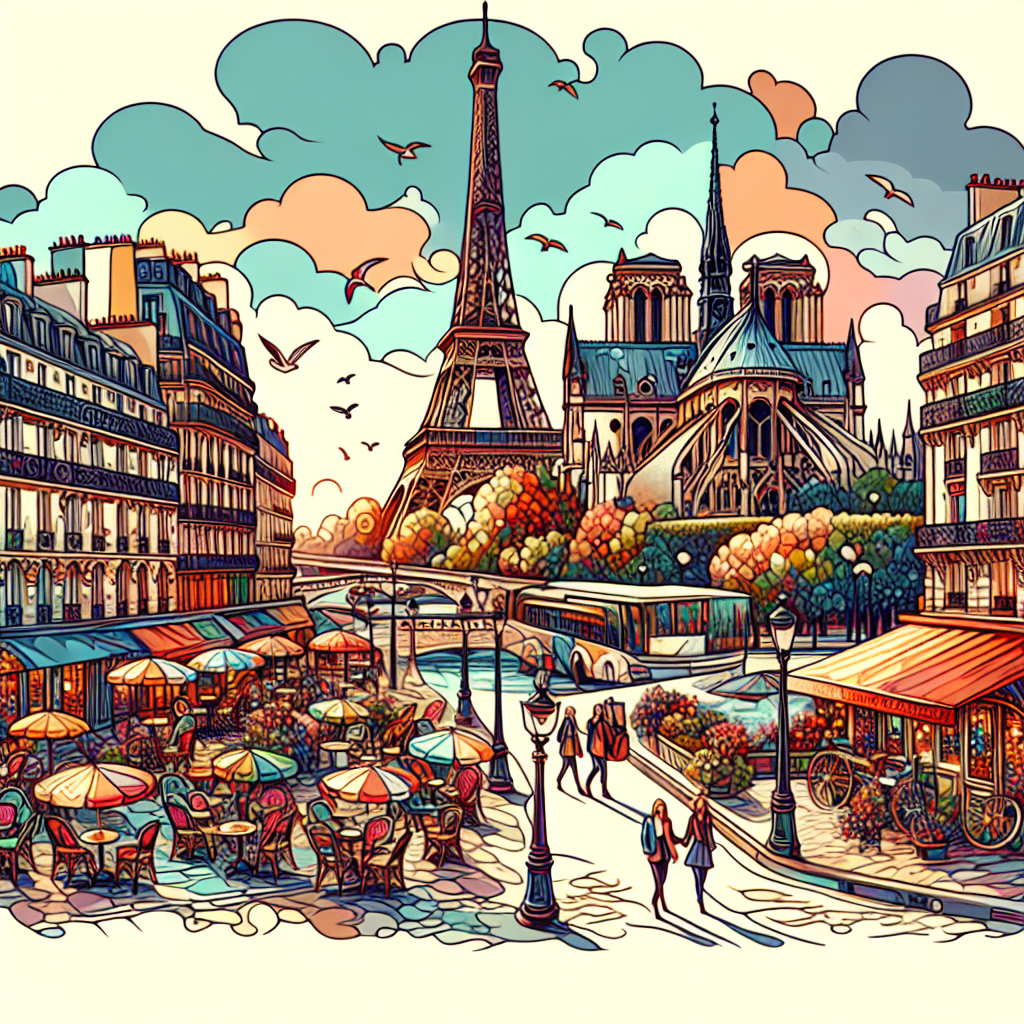

In [4]:
image = artist("Paris")
display(image)

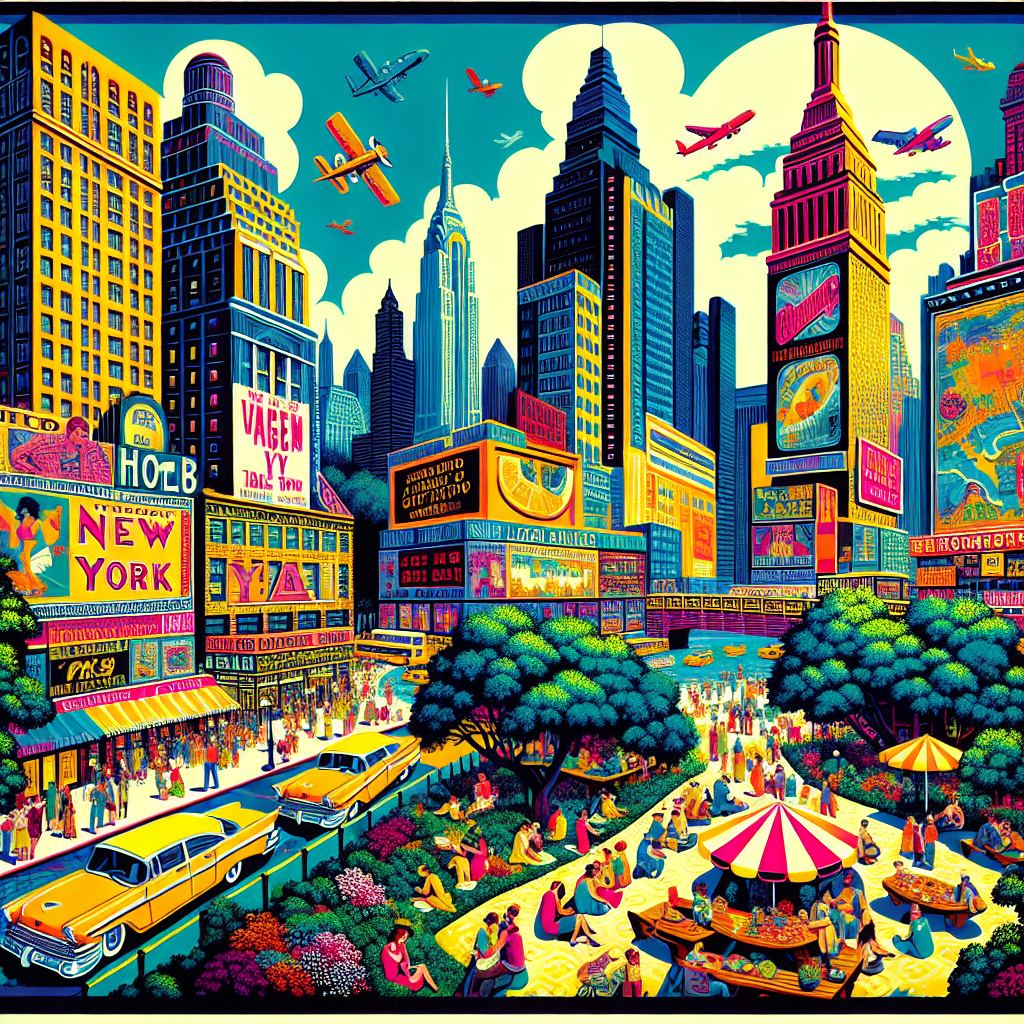

In [5]:
image = artist("New York City")
display(image)

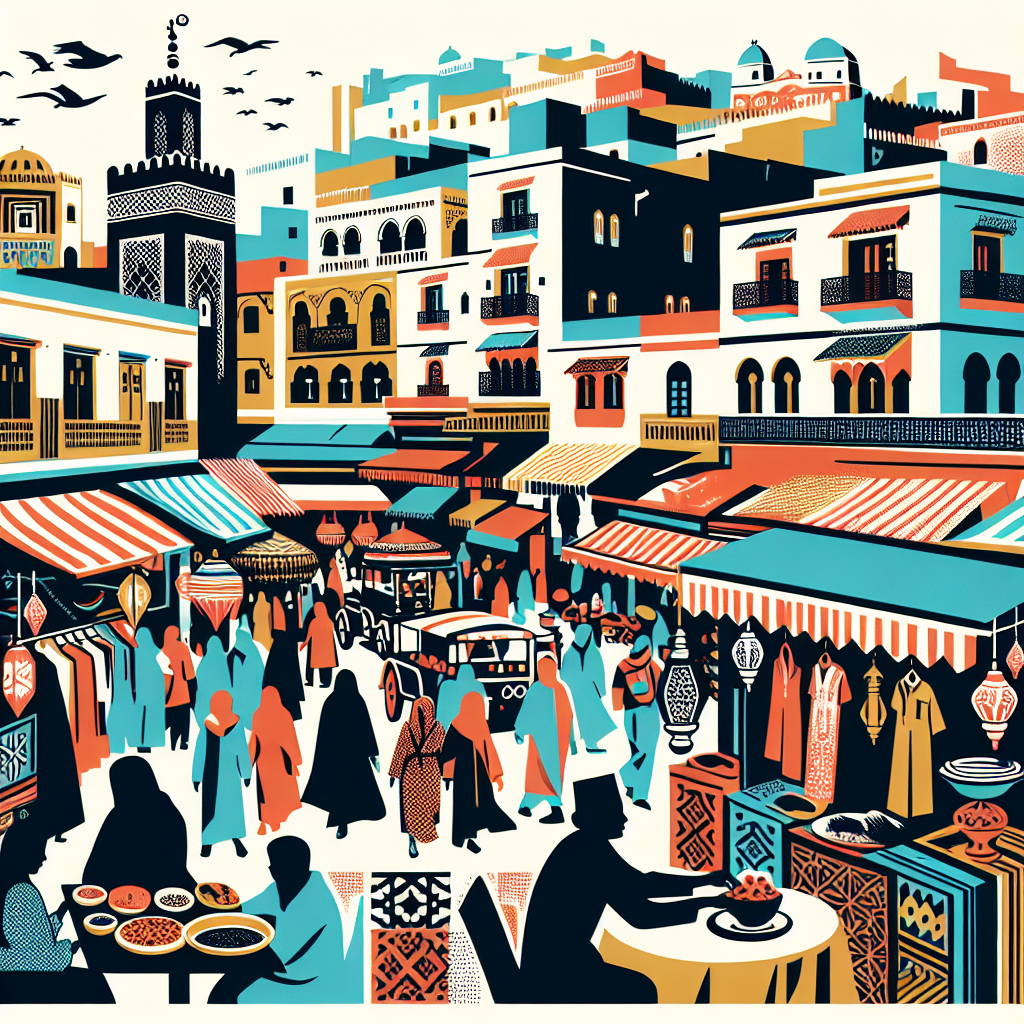

In [6]:
image = artist("Tangier")
display(image)

### OpenAI Audio Generation

Now we're going to create a function talker that uses OpenAI's speech model to generate Audio-

### Troubleshooting Audio issues

**For Mac Users**

1. Install homebrew if you don't have it already by running this in a Terminal window and following any instructions:  
`/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"`

2. Then install FFmpeg with `brew install ffmpeg`

3. Verify your installation with `ffmpeg -version` and if everything is good, within Jupyter Lab do Kernel -> Restart kernel to pick up the changes

In [7]:
from pydub import AudioSegment
from pydub.playback import play

In [8]:
def talker(message):
    response = openai.audio.speech.create(
      model="tts-1", # text to speach model
      voice="onyx", # providing onyx as a voice; alternatively alloy
      input=message
    )
    
    audio_stream = BytesIO(response.content) # create bytes object
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)

In [9]:
talker("Well, hi there")

Input #0, wav, from '/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/tmpdiiob_u0.wav':
  Duration: 00:00:00.74, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s


In [10]:
talker("The crisis consists precisely in the fact that the old is dying and the new cannot be born; in this interregnum a great variety of morbid symptoms appear.")

Input #0, wav, from '/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/tmpalg51v9r.wav':
  Duration: 00:00:09.77, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s
